In [4]:
# OneWay ANOVA 单因素方差检验
# 用来比较不同分组的数据是否有显著的差异F值（F值 = 组间差异 / 组内差异）
# 以及这种显著差异是随机的可能性有多大P值（P越小，说明这种差异越不是随机，而是相关的）
# 用法，修改以下超参数即可
# 超参数
VAULE_X = 'holidays'
VAULE_Y = 'amount'

import pandas as pd

# 读取excel文件并获取指定列
#df = pd.read_csv('Data\store_6922.csv', usecols=['dt', 'amt', 'discount_amount', 'pay_amount', 'num', 'discount', 'discount_percent', 'workdays', 'holidays', 'weekdays', 'text_day', 'text_night', 'high', 'low', 'high_low', 'wc_day'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
print(df)

          date  order_cnt        amount text_day text_night  high  low wc_day  \
0     2023-1-1     893054  2.641542e+08        阴          阴     8    5    <3级   
1     2023-1-2    1042898  3.133427e+08        阴         多云     9    0    <3级   
2     2023-1-3    1174827  3.669793e+08       多云         多云     9    0    <3级   
3     2023-1-4     863885  2.660003e+08       多云         多云    12    3   3~4级   
4     2023-1-5     885530  2.761225e+08       多云         多云    13    2    <3级   
..         ...        ...           ...      ...        ...   ...  ...    ...   
146  2023-5-27     152688  6.893097e+07      雷阵雨          阴    27   22   3~4级   
147  2023-5-28     144274  6.454768e+07        雾        雷阵雨    36   23   4~5级   
148  2023-5-29     188121  8.248444e+07       阵雨          阴    32   22   3~4级   
149  2023-5-30      10435  5.425916e+06       小雨          阴    22   20   3~4级   
150  2023-5-31          1  2.829200e+02        阴         多云    25   20    <3级   

    wd_day wc_night wd_nigh

In [5]:
#删除春节和元旦数据


# 使用 groupby 函数按天气分组，并获取每组的销量数据
value_X = VAULE_X
value_Y = VAULE_Y
coloum_groups = df.groupby(value_X)[value_Y].apply(list)
# 打印结果
for coloum, sales_array in coloum_groups.items():
    print(f"{coloum} 的销量数组: {sales_array}")

元旦 的销量数组: [264154248.5, 313342671.6]
劳动节 的销量数组: [82547224.75, 67721280.51, 53754095.86, 61249839.78, 60158246.97]
平时 的销量数组: [366979346.9, 266000333.6, 276122514.9, 343316550.9, 411677232.7, 294604424.8, 324428101.5, 339684041.3, 345378925.6, 336824244.7, 441316292.0, 363421356.6, 365067472.4, 378840662.0, 360766558.4, 425025853.6, 388634109.0, 407686367.6, 69666865.66, 79357166.95, 87071219.76, 96682459.93, 108982019.9, 125198840.0, 153432525.6, 77304631.35, 70732867.68, 93142003.51, 104609795.4, 106059133.9, 105239311.1, 115475509.3, 97749488.58, 79704219.74, 109025250.9, 113761391.6, 116519547.9, 117181310.0, 121871547.0, 111211820.5, 96523044.03, 116360524.5, 126979791.3, 121481267.7, 116507524.7, 128275626.2, 108537195.3, 94717916.54, 123538705.1, 117325368.3, 118285836.9, 117549520.0, 121407050.7, 113836424.6, 94850432.29, 116370046.9, 114070203.5, 108156745.5, 114011280.0, 127484684.5, 115735696.0, 97921123.49, 125283194.1, 124146800.1, 120681468.8, 125807518.1, 112098490.2, 1198

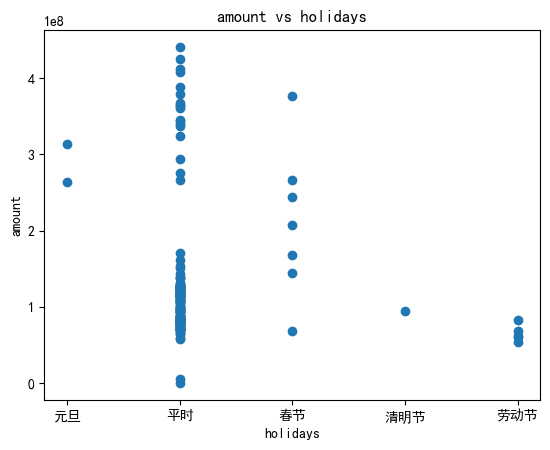

F 统计量: 3.3788029455616955
P 值: 0.011210757452675885


In [6]:
#画出散点图
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体


# 绘制散点图
plt.scatter(df[value_X], df[value_Y])

# 添加标题和坐标轴标签
plt.title(value_Y+' vs '+value_X)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups)


# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)

In [7]:

# IQR法去除所有value_Y(销量)里的异常值

# 计算指定列的下四分位数（Q1）和上四分位数（Q3）
q1 = df[value_Y].quantile(0.25)
q3 = df[value_Y].quantile(0.75)

# 计算 IQR
iqr = q3 - q1

# 定义上下界
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 删除异常值所在的行
df2 = df[(df[value_Y] >= lower_bound) & (df[value_Y] <= upper_bound)]


# 输出处理后的结果
print(df2)

          date  order_cnt        amount text_day text_night  high  low wc_day  \
21   2023-1-22     534310  1.447037e+08        阴          阴     8    3   3~4级   
25   2023-1-26     602848  1.680202e+08       多云         多云     6   -3   3~4级   
26   2023-1-27     203183  6.769289e+07       多云          晴     3   -6   3~4级   
27   2023-1-28     185226  6.966687e+07        晴          晴     7   -2   3~4级   
28   2023-1-29     193367  7.935717e+07        晴          晴    11   -1   3~4级   
..         ...        ...           ...      ...        ...   ...  ...    ...   
144  2023-5-25     164963  7.371985e+07        雾          阴    26   19    <3级   
145  2023-5-26     188022  8.312239e+07      雷阵雨         中雨    28   22   3~4级   
146  2023-5-27     152688  6.893097e+07      雷阵雨          阴    27   22   3~4级   
147  2023-5-28     144274  6.454768e+07        雾        雷阵雨    36   23   4~5级   
148  2023-5-29     188121  8.248444e+07       阵雨          阴    32   22   3~4级   

    wd_day wc_night wd_nigh

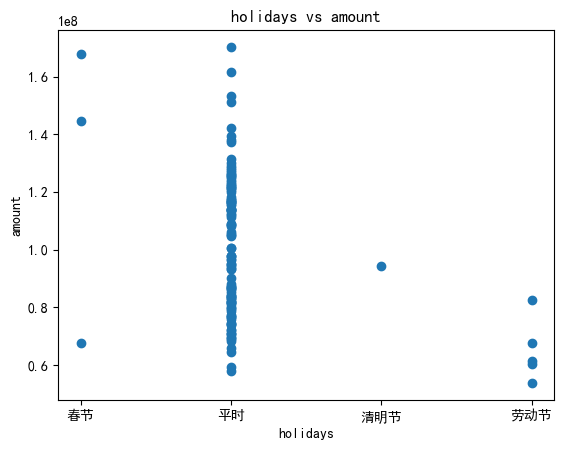

F 统计量: 4.864184087449948
P 值: 0.0031404381664871957


In [8]:

coloum_groups_df2 = df2.groupby(value_X)[value_Y].apply(list)


# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df2[value_X], df2[value_Y])

# 添加标题和坐标轴标签
plt.title(value_X+' vs '+value_Y)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups_df2)

# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)